# Import Required Libraries
Import necessary libraries, including NumPy, Pandas, TensorFlow, and Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
from keras import models, regularizers, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt

# Load and Preprocess Data
Load the IMDB dataset and preprocess the data, including padding sequences.

In [2]:
# Load the IMDB dataset
(train_X, train_Y), (test_X, test_Y) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input size
max_length = 500
train_X = pad_sequences(train_X, maxlen=max_length)
test_X = pad_sequences(test_X, maxlen=max_length)

# Print the shape of the data to verify
print(f"Training data shape: {train_X.shape}")
print(f"Testing data shape: {test_X.shape}")

Training data shape: (25000, 500)
Testing data shape: (25000, 500)


# One-Hot Encoding
Define a function to perform one-hot encoding on the sequences.

In [3]:
# One-Hot Encoding

def one_hot_encoding(sequences, dimension=10000):
    """
    Converts a list of sequences (e.g., movie reviews as word indices)
    into one-hot encoded vectors.

    Each sequence is transformed into a vector where each element represents
    a word in the vocabulary. If a word is present in the sequence, the
    corresponding element in the vector is set to 1, otherwise 0.

    Args:
        sequences: A list of sequences to encode.
        dimension: The size of the vocabulary (default: 10000).

    Returns:
        A NumPy array containing the one-hot encoded vectors.
    """
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Apply one-hot encoding to the training and testing data
train_X = one_hot_encoding(train_X)
test_X = one_hot_encoding(test_X)

# Print the shape of the data to verify
print(f"One-hot encoded training data shape: {train_X.shape}")
print(f"One-hot encoded testing data shape: {test_X.shape}")

One-hot encoded training data shape: (25000, 10000)
One-hot encoded testing data shape: (25000, 10000)


# Build and Compile Model
Build and compile the neural network model using Keras.

In [4]:
# Build and Compile Model

# Define the model architecture
model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)),
    Dropout(0.5),
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model
Train the model using the training data and validate it using the validation data.

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5621 - loss: 1.7073 - val_accuracy: 0.8360 - val_loss: 0.7268
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7327 - loss: 0.7256 - val_accuracy: 0.8461 - val_loss: 0.6240
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7807 - loss: 0.6670 - val_accuracy: 0.8540 - val_loss: 0.5785
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8152 - loss: 0.6283 - val_accuracy: 0.8574 - val_loss: 0.5575
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8195 - loss: 0.6232 - val_accuracy: 0.8564 - val_loss: 0.5563
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8314 - loss: 0.6083 - val_accuracy: 0.8649 - val_loss: 0.5474
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8418 - loss: 0.6050 - val_accuracy: 0.8652 - val_loss: 0.5505
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8433 - loss: 0.5975 - val_accuracy: 0.8648 - v

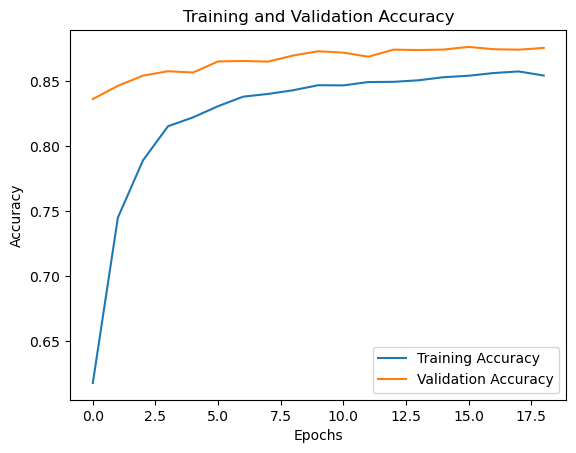

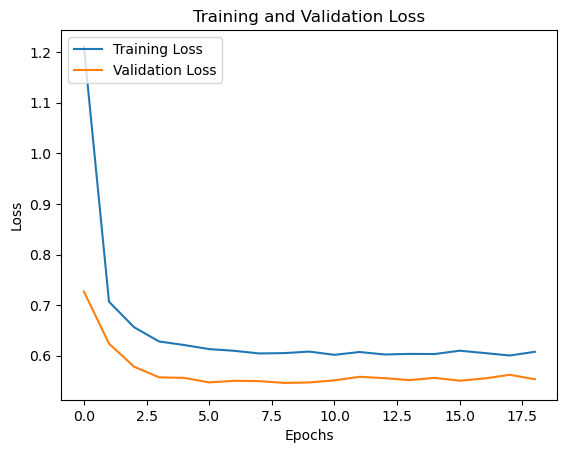

In [5]:
# Train the Model

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model using the training data and validate it using the validation data
history = model.fit(
    train_X, train_Y,
    epochs=30,
    batch_size=500,
    validation_data=(test_X, test_Y),
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_X, test_Y)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Evaluate the Model
Evaluate the model using the test data and print the test accuracy.

In [6]:
# Evaluate the Model

# Evaluate the model using the test data
test_loss, test_acc = model.evaluate(test_X, test_Y)

# Print the test accuracy
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8695 - loss: 0.5473
Test Accuracy: 0.8694


# Make Predictions
Define functions to encode reviews and make predictions using the trained model.

In [7]:
# Make Predictions

# Define a function to encode reviews
def encode_review(review):
    word_index = imdb.get_word_index()
    words = review.lower().split()
    encoded = [word_index.get(word, 2) for word in words]
    one_hot_encoded = np.zeros((1, 10000))  # Ensure the vector size is 10000
    for index in encoded:
        if index < 10000:
            one_hot_encoded[0, index] = 1
    return one_hot_encoded

# Define a function to make predictions
def prediction(review):
    print("Predicting...")
    encoded_review = encode_review(review)
    prediction = model.predict(encoded_review)
    print(f"Review: '{review}'")
    print(f"Sentiment: {'Positive' if prediction[0][0] > 0.5 else 'Negative'}")


Predicting...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: 'This movie was fantastic! I really enjoyed it.'
Sentiment: Positive
Predicting...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Review: 'The movie was terrible and boring.'
Sentiment: Positive


In [13]:
prediction("This movie was fantastic! I really enjoyed it.")
prediction("The movie was awful. The worst I've ever seen.")

Predicting...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Review: 'This movie was fantastic! I really enjoyed it.'
Sentiment: Positive
Predicting...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Review: 'The movie was awful. The worst I've ever seen.'
Sentiment: Negative
